In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from deepkan import SplineLinearLayer
# from BKAN import SplineLinearLayer
import random
from torch import autograd
from tqdm import tqdm
import os
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import nodepy.linear_multistep_method as lm
import torch.nn as nn
import torch.optim as optim


# Define the custom KAN layer
class KANLayer(nn.Module):
    def __init__(self, in_features, out_features, 
                 num_knots=5, spline_order=2, 
                 noise_scale=0.1, base_scale=1.0, 
                 spline_scale=1.0, activation=nn.SiLU, 
                 grid_epsilon=0.02, grid_range=[0, 81]):
        super(KANLayer, self).__init__()
        self.linear = SplineLinearLayer(in_features, out_features, num_knots, 
                                        spline_order, noise_scale, base_scale, 
                                        spline_scale, activation, grid_epsilon, grid_range)

    def forward(self, x):
        return self.linear(x)

# Define the combined model
class KANModel(nn.Module):
    def __init__(self):
        super(KANModel, self).__init__()
        self.kan_layer1 = KANLayer(2 ,5)    
        # self.ln1 = nn.Tanh()
        # self.ln1 = nn.Sigmoid()
        self.kan_layer2 = KANLayer(5, 2)  

    def forward(self, x):
        x = x.view(-1, 2)  # Flatten the input tensor
        x = self.kan_layer1(x)
        x = self.kan_layer2(x)
        return x
    
torch.set_default_dtype(torch.float64) # 设置默认张量数据类型为双精度浮点数

In [ ]:
import numpy as np

# 生成 50 个 [0, 10] 之间的均匀分布随机数
random_numbers = np.random.uniform(0, 10, 50)


x0 = np.array([2,0])

random_numbers.shape


In [ ]:
from scipy.integrate import odeint
import numpy as np

x0 = np.random.uniform(0, 10, 50)
# x0 = np.linspace(0, 10, 50)
n_steps = 1000
# t_star = np.arange(0,25,0.01)
t_star = np.linspace(0, 10, num=n_steps)


def phi(r):
    if 0 <= r <= 1:
        return 1
    else:
        return 0

def f(x, t, alpha=1, N=50):
        # 假设 x 是一维数组，包含 N 个标量 x_i
        f = np.zeros(N)  # 初始化 dx/dt，形状为 (N,)
        
        for i in range(N):
            for j in range(N):
                if i != j:
                    # 计算 x_j - x_i
                    diff = x[j] - x[i]
                    # 计算 a_ij
                    a_ij = phi(abs(diff) / N)
                    # 累加 alpha * a_ij * (x_j - x_i) 到 f[i]
                    f[i] += alpha * a_ij * diff
        
        return f.flatten()  # 返回一维数组

X_star = odeint(f, x0, t_star)

In [ ]:
from scipy.integrate import odeint
import numpy as np

x0 = np.random.uniform(0, 10, 50)
# x0 = np.linspace(0, 10, 50)
n_steps = 1000
# t_star = np.arange(0,25,0.01)
t_star = np.linspace(0, 60, num=n_steps)


def phi(r):
    if 0 <= r <= 1:
        return 1
    else:
        return 0

def f(x, t, alpha=1, N=50):
        # 假设 x 是一维数组，包含 N 个标量 x_i
        f = np.zeros(N)  # 初始化 dx/dt，形状为 (N,)
        
        for i in range(N):
            phi_ik_sum = sum(phi(abs(x[k] - x[i])) for k in range(N) if k != i)
            for j in range(N):
                if i != j:
                    # 计算 x_j - x_i
                    diff = x[j] - x[i]
                    phi_ij = phi(abs(diff))
                    # 计算 a_ij = phi_ij / sum(phi_ik)
                    if phi_ik_sum != 0:
                        a_ij = phi_ij / phi_ik_sum
                    else:
                        a_ij = 0  # 如果分母为 0，则 a_ij 为 0
                    # 累加 alpha * a_ij * (x_j - x_i) 到 f[i]
                    f[i] += alpha * a_ij * diff
        
        return f.flatten()  # 返回一维数组

X_star = odeint(f, x0, t_star)

In [ ]:
from scipy.integrate import odeint
import numpy as np

x0 = np.random.uniform(0, 10, 50)
# x0 = np.linspace(0, 10, 50)
n_steps = 10000
# t_star = np.arange(0,25,0.01)
t_star = np.linspace(0, 20, num=n_steps)


def phi(r):
    # 计算 1/sqrt(2)
    sqrt2_inv = 1 / np.sqrt(2)
    # 初始化 phi 为 0
    phi_values = np.zeros_like(r)
    # 对于 r 在 [0, 1/sqrt(2]] 区间内，phi(r) = 0.1
    phi_values[(r >= 0) & (r <= sqrt2_inv)] = 0.1
    # 对于 r 在 (1/sqrt(2), 1] 区间内，phi(r) = 1
    phi_values[(r > sqrt2_inv) & (r <= 1)] = 1
    return phi_values

def f(x, t, alpha=3, N=50):
        # 假设 x 是一维数组，包含 N 个标量 x_i
        f = np.zeros(N)  # 初始化 dx/dt，形状为 (N,)
        
        for i in range(N):
            for j in range(N):
                if i != j:
                    # 计算 x_j - x_i
                    diff = x[j] - x[i]
                    # 计算 a_ij
                    a_ij = phi(abs(diff) / N)
                    # 累加 alpha * a_ij * (x_j - x_i) 到 f[i]
                    f[i] += alpha * a_ij * diff
        
        return f.flatten()  # 返回一维数组

X_star = odeint(f, x0, t_star)

In [ ]:
import matplotlib.pyplot as plt
# 创建图形
plt.figure(figsize=(10, 6))

# 绘制每一条解
for i in range(50):
    plt.plot(t_star, X_star[:, i], label=f'Solution {i+1}', linewidth=0.8)

# 图形的标题和标签
plt.title("Solutions of 50 Trajectories over Time")
plt.xlabel("Time")
plt.ylabel("x values")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1.0), fontsize='small', ncol=1, frameon=False)

In [ ]:
source_fun_1 = lambda t: 4*t
source_fun_2 = lambda t: -4*t

sol_fun_1 = lambda x:  2 * x[:,[0]] + 3 * x[:,[1]] 
sol_fun_2 = lambda x:   - 4 * x[:,[1]] 

In [ ]:
test_steps = 10
# test_np = np.random.uniform(0, 1, test_steps)
test_np = np.linspace(0, 1, num=test_steps)
y_test_np1 = source_fun_1(torch.from_numpy(test_np))
y_test_np2= source_fun_2(torch.from_numpy(test_np))
y_test_np = torch.stack([y_test_np1, y_test_np2], axis=1)



# K = torch.cat((y_test_np1, y_test_np2), dim=0)
# K.view(-1, 2)
# y_test_np.shape
f_test_1 =sol_fun_1(y_test_np)
f_test_2 =sol_fun_2(y_test_np)
f_test = torch.cat((f_test_1, f_test_2), dim=1).detach()




# f_test.shape
# # y_test_np = torch.stack([y_test_np1, y_test_np2], axis=1).numpy()
model = KANModel()
f_nn= model(y_test_np).detach()

In [ ]:
torch.mean((f_test - f_nn)**2)
# model(K).shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义参数
L = 1.0  # 域的长度
T = 1.0  # 总时间
Nx = 100  # 空间网格点数
Nt = 1000  # 时间步数
dx = L / (Nx - 1)  # 空间网格间距
dt = T / Nt  # 时间步长
alpha = 0.01  # 扩散系数
x = np.linspace(0, L, Nx)  # 空间网格点坐标
t = np.linspace(0, T, Nt)  # 时间网格点

# 初始化解和边界条件
u = np.zeros((Nt, Nx))
u[0, :] = np.sin(np.pi * x)  # 初始条件
u[:, 0] = 0  # Dirichlet边界条件
u[:, -1] = 0  # Dirichlet边界条件

# 构建空间离散的拉普拉斯算子
laplacian = np.zeros((Nx, Nx))
for i in range(1, Nx-1):
    laplacian[i, i-1] = 1
    laplacian[i, i] = -2
    laplacian[i, i+1] = 1

# 时间步进循环
for n in range(Nt-1):
    for i in range(1, Nx-1):
        u[n+1, i] = u[n, i] + alpha * dt / dx**2 * (laplacian[i, i-1]*u[n, i-1] + laplacian[i, i]*u[n, i] + laplacian[i, i+1]*u[n, i+1])
    # 应用边界条件
    u[n+1, 0] = 0
    u[n+1, -1] = 0

# 绘制结果
plt.figure(figsize=(10, 6))
for i in range(0, Nt, Nt//10):
    plt.plot(x, u[i, :], label=f't={i*dt:.2f}')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend()
plt.title('Solution of the Heat Equation')
plt.show()

In [ ]:
# train_input = y_train_new
# train_label = model(y_train_new)
# test_input = y_train_new
# test_label = model(y_train_new)

# dataset_v03 = {}
# dataset_v03['train_input'] = train_input
# dataset_v03['test_input']   = test_input
# dataset_v03['train_label'] = train_label
# dataset_v03['test_label']   = test_label

In [ ]:
import numpy as np

# 初始化空列表
all_train_input = []
all_train_label = []

for i in range(1, 12):
    data = dict(np.load(f'train_data{i}.npz'))
    all_train_input.append(data['train_input'])
    all_train_label.append(data['train_label'])

# 拼接所有数据
train_input = np.vstack(all_train_input)
train_label = np.vstack(all_train_label)

# 将两个数据保存到一个.npy文件中
train_data = {
    'train_input': train_input,
    'train_label': train_label
}

# 使用 numpy 的 savez 函数保存多个数组到一个文件
np.savez('train_data.npz', **train_data)

In [ ]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# 生成示例数据（带噪声的正弦波）
np.random.seed(42)
t = np.linspace(0, 10, 500)  # 500个时间点
x_true = np.sin(t) + 0.5*np.sin(2*t)  # 真实信号（两个频率叠加）
noise = 0.2 * np.random.randn(len(t))  # 高斯噪声
x_noisy = x_true + noise  # 带噪声观测

# 不同参数组合的效果对比
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# 1. 原信号 vs 噪声信号
axes[0, 0].plot(t, x_true, 'b-', label='True signal', alpha=0.7)
axes[0, 0].plot(t, x_noisy, 'r-', label='Noisy signal', alpha=0.4)
axes[0, 0].set_title('Original vs Noisy Signal')
axes[0, 0].legend()

# 2. 窗口长度影响（固定阶数3）
window_lengths = [5, 11, 21]
for wl in window_lengths:
    x_smooth = savgol_filter(x_noisy, window_length=wl, polyorder=3)
    axes[0, 1].plot(t, x_smooth, label=f'window={wl}')
axes[0, 1].plot(t, x_true, 'k--', label='True', alpha=0.5)
axes[0, 1].set_title('Effect of Window Length (polyorder=3)')
axes[0, 1].legend()

# 3. 多项式阶数影响（固定窗口11）
polyorders = [1, 2, 3, 4]
for po in polyorders:
    x_smooth = savgol_filter(x_noisy, window_length=11, polyorder=po)
    axes[1, 0].plot(t, x_smooth, label=f'order={po}')
axes[1, 0].plot(t, x_true, 'k--', label='True', alpha=0.5)
axes[1, 0].set_title('Effect of Polynomial Order (window=11)')
axes[1, 0].legend()

# 4. 计算导数示例
x_clean = savgol_filter(x_noisy, window_length=11, polyorder=3)
velocity = savgol_filter(x_clean, window_length=11, polyorder=3, deriv=1)
true_velocity = np.cos(t) + np.cos(2*t)  # 理论导数

axes[1, 1].plot(t, velocity, 'r-', label='Estimated velocity')
axes[1, 1].plot(t, true_velocity, 'k--', label='True velocity', alpha=0.5)
axes[1, 1].set_title('Derivative Estimation')
axes[1, 1].legend()

# 5. 误差分析
best_smooth = savgol_filter(x_noisy, window_length=11, polyorder=3)
error = best_smooth - x_true

axes[2, 0].plot(t, error, 'g-')
axes[2, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[2, 0].set_title(f'Smoothing Error (RMSE={np.sqrt(np.mean(error**2)):.4f})')
axes[2, 0].set_xlabel('Time')
axes[2, 0].set_ylabel('Error')

# 6. 频谱分析（可选）
from scipy.fft import fft, fftfreq
N = len(t)
freq = fftfreq(N, t[1]-t[0])
fft_noisy = np.abs(fft(x_noisy))[:N//2]
fft_smooth = np.abs(fft(best_smooth))[:N//2]

axes[2, 1].semilogy(freq[:N//2], fft_noisy[:N//2], 'r-', alpha=0.5, label='Noisy')
axes[2, 1].semilogy(freq[:N//2], fft_smooth[:N//2], 'b-', label='Smoothed')
axes[2, 1].set_title('Frequency Spectrum')
axes[2, 1].set_xlabel('Frequency')
axes[2, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Savitzky-Golay vs 简单移动平均
window = 11

# Savitzky-Golay（二次多项式）
sg_smooth = savgol_filter(x_noisy, window_length=window, polyorder=2)

# 简单移动平均
ma_smooth = np.convolve(x_noisy, np.ones(window)/window, mode='same')

# 比较：
# - Savitzky-Golay：保留峰值特征更好
# - 移动平均：可能会使峰值变平
# - Savitzky-Golay：计算导数更准确

In [ ]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 1. 生成示例数据
np.random.seed(0)  # 设置随机种子以便复现
t = np.linspace(0, 20, 500)  # 时间从0到10，500个点

# 真实的动力系统信号（模拟一个复杂的非线性系统）
x_true = (
    2.0 * np.sin(t) +           # 基频
    0.5 * np.sin(2.5 * t) +    # 谐波1
    0.3 * np.sin(4.0 * t) +    # 谐波2
    0.1 * np.exp(-0.3 * t) * np.sin(0.8 * t)  # 衰减振荡
)

# 添加高斯噪声
noise_level = 0.2  # 噪声水平
noise = noise_level * np.random.randn(len(t))
x_noisy = x_true + noise

# 2. 应用Savitzky-Golay滤波器
# 选择参数：窗口长度21，多项式阶数3
window_length = 21
polyorder = 3
sg_smooth = savgol_filter(x_noisy, window_length=window_length, polyorder=polyorder)

# 3. 绘制对比图
plt.figure(figsize=(12, 8))

# 绘制三条曲线
plt.plot(t, x_true, 'b-', linewidth=2.5, label='真实信号 (x_true)', alpha=0.9)
plt.plot(t, x_noisy, 'r-', linewidth=1.0, label=f'带噪声信号 (x_noisy, 噪声水平={noise_level})', alpha=0.6)
plt.plot(t, sg_smooth, 'g-', linewidth=2.0, 
         label=f'滤波后信号 (sg_smooth, window={window_length}, order={polyorder})', alpha=0.9)

plt.ylabel('信号值', fontsize=12)
plt.xlabel('时间 (t)', fontsize=12)
plt.title('Savitzky-Golay滤波器效果对比', fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0, 10])

# 添加放大的细节区域
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_ax = inset_axes(plt.gca(), width="35%", height="35%", loc='upper left', bbox_to_anchor=(0.05, 0.05, 0.5, 0.5))
zoom_region = (3.5, 5.5)  # 放大时间区域
inset_ax.plot(t, x_true, 'b-', linewidth=2.5, alpha=0.9)
inset_ax.plot(t, x_noisy, 'r-', linewidth=1.0, alpha=0.6)
inset_ax.plot(t, sg_smooth, 'g-', linewidth=2.0, alpha=0.9)
inset_ax.set_xlim(zoom_region)
inset_ax.set_ylim([-1.5, 2.0])
inset_ax.set_title('细节放大区域', fontsize=10)
inset_ax.grid(True, alpha=0.3)
inset_ax.tick_params(labelsize=8)

# 计算并显示一些统计信息
rmse = np.sqrt(np.mean((sg_smooth - x_true)**2))
max_error = np.max(np.abs(sg_smooth - x_true))
original_noise_power = np.mean((x_noisy - x_true)**2)
filtered_noise_power = np.mean((sg_smooth - x_true)**2)
improvement_ratio = (original_noise_power - filtered_noise_power) / original_noise_power * 100

# 在图中添加统计信息
stats_text = f'RMSE: {rmse:.4f}\n最大绝对误差: {max_error:.4f}\n噪声功率减少: {improvement_ratio:.1f}%'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 1. 生成示例数据 (保持原样)
np.random.seed(0)
t = np.linspace(0, 20, 500)
dt = t[1] - t[0]  # 计算时间步长

# 真实的动力系统信号
x_true = (
    2.0 * np.sin(t) +
    0.5 * np.sin(2.5 * t) +
    0.3 * np.sin(4.0 * t) +
    0.1 * np.exp(-0.3 * t) * np.sin(0.8 * t)
)

# 添加高斯噪声
noise_level = 0.02  # 稍微加大一点噪声以便观察KF效果
noise = noise_level * np.random.randn(len(t))
x_noisy = x_true + noise

# 2. 应用卡尔曼滤波器 (Kalman Filter)
def kalman_filter_smoothing(data, dt, measurement_noise):
    n_iter = len(data)
    sz = (n_iter,)
    
    # --- 初始化参数 ---
    # Q: 过程噪声协方差 (Process Noise Covariance)
    # 决定了我们多大程度上相信"模型预测"。Q越小，曲线越平滑但可能滞后；Q越大，越贴近测量值。
    # 这里假设是一个常加速度过程的离散化噪声
    q_var = 0.1  
    Q = np.array([[0.25*dt**4, 0.5*dt**3],
                  [0.5*dt**3,  dt**2]]) * q_var

    # R: 测量噪声协方差 (Measurement Noise Covariance)
    # 也就是我们已知的数据噪声水平的平方
    R = measurement_noise**2
    
    # 初始状态 [位置, 速度]
    xhat = np.zeros((2, 1)) 
    xhat[0] = data[0]
    
    # 初始估计协方差 P
    P = np.eye(2) 

    # 状态转移矩阵 F (基于常速度模型: x = x + v*dt)
    F = np.array([[1, dt],
                  [0, 1]])
    
    # 观测矩阵 H (我们只观测到位置)
    H = np.array([[1, 0]])
    
    # 存储结果
    result = np.zeros(sz)
    
    # --- 滤波循环 ---
    for k in range(n_iter):
        # 1. 预测 (Predict)
        xhat_minus = F @ xhat
        P_minus = F @ P @ F.T + Q
        
        # 2. 更新 (Update)
        K = P_minus @ H.T * (1 / (H @ P_minus @ H.T + R)) # 卡尔曼增益
        z = data[k] # 当前测量值
        xhat = xhat_minus + K * (z - H @ xhat_minus)
        P = (np.eye(2) - K @ H) @ P_minus
        
        result[k] = xhat[0, 0]
        
    return result

# 执行滤波
kf_smooth = kalman_filter_smoothing(x_noisy, dt, noise_level)

# 3. 绘制对比图 (修改了标签和颜色以适配KF)
plt.figure(figsize=(12, 8))

# 绘制三条曲线
plt.plot(t, x_true, 'b-', linewidth=2.5, label='真实信号 (x_true)', alpha=0.9)
plt.plot(t, x_noisy, 'r-', linewidth=1.0, label=f'带噪声信号 (噪声水平={noise_level})', alpha=0.4) # alpha调低一点，突出滤波线
plt.plot(t, kf_smooth, 'k-', linewidth=2.0, 
         label='卡尔曼滤波信号 (Kalman Filter)', alpha=0.9) # 使用黑色突出显示

plt.ylabel('信号值', fontsize=12)
plt.xlabel('时间 (t)', fontsize=12)
plt.title('卡尔曼滤波 (Kalman Filter) 去噪效果', fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0, 10])

# 添加放大的细节区域
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_ax = inset_axes(plt.gca(), width="35%", height="35%", loc='upper left', bbox_to_anchor=(0.05, 0.05, 0.5, 0.5))
zoom_region = (3.5, 5.5)
filter_indices = (t >= zoom_region[0]) & (t <= zoom_region[1]) # 为了画图效率只画区域内的点

inset_ax.plot(t[filter_indices], x_true[filter_indices], 'b-', linewidth=2.5, alpha=0.9)
inset_ax.plot(t[filter_indices], x_noisy[filter_indices], 'r-', linewidth=1.0, alpha=0.4)
inset_ax.plot(t[filter_indices], kf_smooth[filter_indices], 'k-', linewidth=2.0, alpha=0.9)
inset_ax.set_xlim(zoom_region)
# 自动调整ylim
y_zoom = x_true[filter_indices]
inset_ax.set_ylim([np.min(y_zoom)-0.5, np.max(y_zoom)+0.5])
inset_ax.set_title('细节放大区域', fontsize=10)
inset_ax.grid(True, alpha=0.3)
inset_ax.tick_params(labelsize=8)

# 计算并显示统计信息
rmse = np.sqrt(np.mean((kf_smooth - x_true)**2))
max_error = np.max(np.abs(kf_smooth - x_true))
original_noise_power = np.mean((x_noisy - x_true)**2)
filtered_noise_power = np.mean((kf_smooth - x_true)**2)
improvement_ratio = (original_noise_power - filtered_noise_power) / original_noise_power * 100

stats_text = f'RMSE: {rmse:.4f}\n最大绝对误差: {max_error:.4f}\n噪声功率减少: {improvement_ratio:.1f}%'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20236\454519472.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


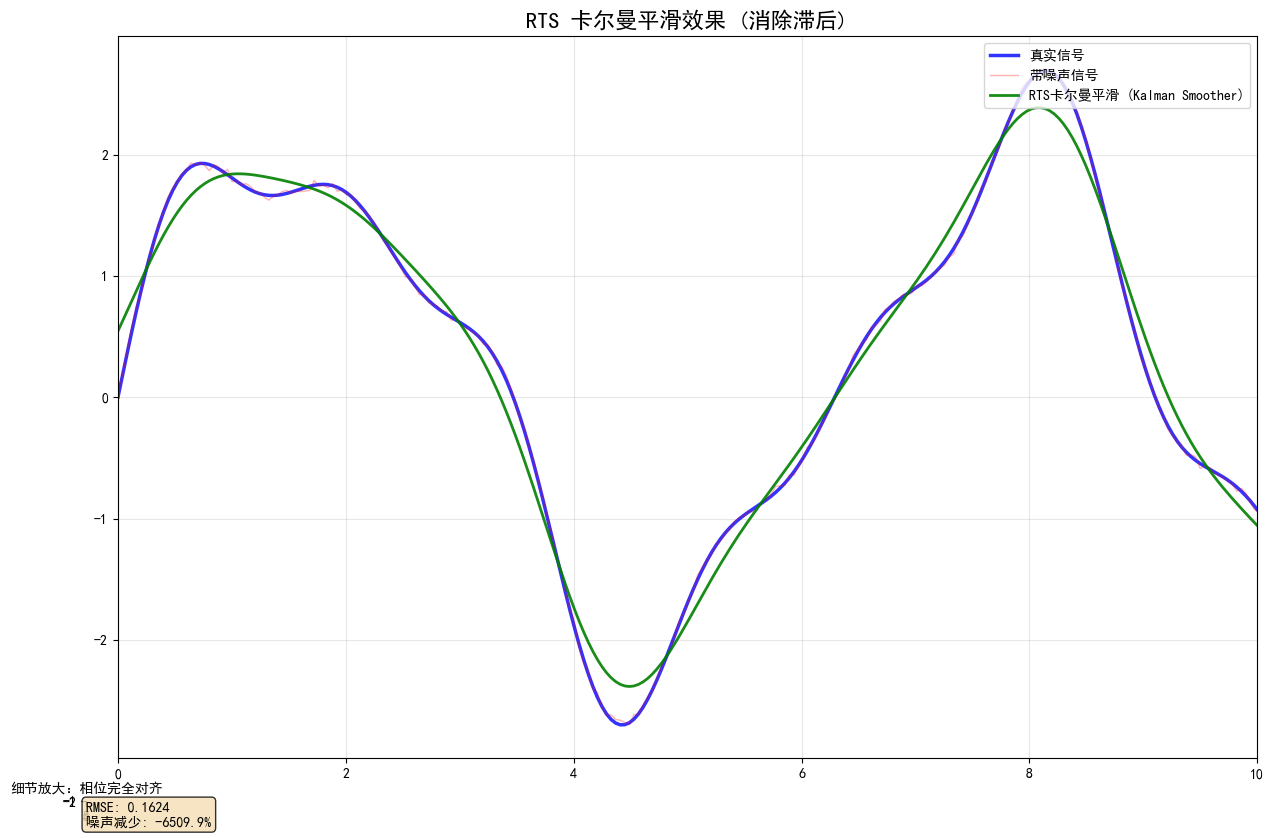

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 1. 生成数据 (保持不变)
np.random.seed(0)
t = np.linspace(0, 20, 500)
dt = t[1] - t[0]

x_true = (
    2.0 * np.sin(t) + 
    0.5 * np.sin(2.5 * t) + 
    0.3 * np.sin(4.0 * t) + 
    0.1 * np.exp(-0.3 * t) * np.sin(0.8 * t)
)

noise_level = 0.02
x_noisy = x_true + noise_level * np.random.randn(len(t))

# 2. 实现 RTS 平滑 (Kalman Smoother)
def rts_kalman_smoother(data, dt, measurement_noise_std):
    n_iter = len(data)
    
    # --- 参数设置 ---
    # 调大 Q 可以减少滞后，但会增加噪声；RTS 平滑器允许我们把 Q 设大一点
    # 因为后向过程会把多余的噪声再平滑掉。
    q_var = 5.0  # 稍微调大过程噪声方差，适应快速变化的正弦波
    Q = np.array([[0.25*dt**4, 0.5*dt**3],
                  [0.5*dt**3,  dt**2]]) * q_var
    R = measurement_noise_std**2
    
    # 状态转移矩阵 F 和 观测矩阵 H
    F = np.array([[1, dt], [0, 1]])
    H = np.array([[1, 0]])
    
    # 存储前向滤波的中间结果，供后向使用
    x_priors = np.zeros((n_iter, 2, 1)) # 先验状态
    P_priors = np.zeros((n_iter, 2, 2)) # 先验协方差
    x_posteriors = np.zeros((n_iter, 2, 1)) # 后验状态
    P_posteriors = np.zeros((n_iter, 2, 2)) # 后验协方差
    
    # --- 1. 前向滤波 (Forward Pass) ---
    xhat = np.array([[data[0]], [0]]) # 初始状态
    P = np.eye(2) * 1.0
    
    for k in range(n_iter):
        # 预测
        x_minus = F @ xhat
        P_minus = F @ P @ F.T + Q
        
        # 记录先验 (用于后向平滑)
        x_priors[k] = x_minus
        P_priors[k] = P_minus
        
        # 更新
        K = P_minus @ H.T * (1 / (H @ P_minus @ H.T + R))
        z = data[k]
        xhat = x_minus + K * (z - H @ x_minus)
        P = (np.eye(2) - K @ H) @ P_minus
        
        # 记录后验
        x_posteriors[k] = xhat
        P_posteriors[k] = P
        
    # --- 2. 后向平滑 (Backward Pass / RTS) ---
    # 初始化平滑后的结果，从最后一个点开始
    x_smooth = np.copy(x_posteriors)
    
    # 倒序循环 (从 n-2 到 0)
    for k in range(n_iter - 2, -1, -1):
        # 计算平滑增益 Ck
        # Ck = P_k|k * F.T * (P_k+1|k)^-1
        P_now = P_posteriors[k]
        P_next_prior = P_priors[k+1]
        
        # 使用伪逆防止矩阵奇异，虽然在KF中很少见
        C_k = P_now @ F.T @ np.linalg.pinv(P_next_prior)
        
        # 更新平滑后的状态
        # x_k^s = x_k|k + C_k * (x_k+1^s - x_k+1|k)
        x_next_smooth = x_smooth[k+1]
        x_next_prior = x_priors[k+1]
        
        x_smooth[k] = x_posteriors[k] + C_k @ (x_next_smooth - x_next_prior)

    return x_smooth[:, 0, 0] # 返回位置状态

# 执行 RTS 平滑
rts_result = rts_kalman_smoother(x_noisy, dt, 0.2)

# 3. 绘图对比
plt.figure(figsize=(12, 8))
plt.plot(t, x_true, 'b-', linewidth=2.5, label='真实信号', alpha=0.8)
plt.plot(t, x_noisy, 'r-', linewidth=1.0, label='带噪声信号', alpha=0.3)
plt.plot(t, rts_result, 'g-', linewidth=2.0, label='RTS卡尔曼平滑 (Kalman Smoother)', alpha=0.9)

plt.title('RTS 卡尔曼平滑效果 (消除滞后)', fontsize=16, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim([0, 10])

# 放大细节
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_ax = inset_axes(plt.gca(), width="35%", height="35%", loc='upper left', bbox_to_anchor=(0.05, 0.05, 0.5, 0.5))
zoom_mask = (t > 3.5) & (t < 5.5)
inset_ax.plot(t[zoom_mask], x_true[zoom_mask], 'b-', linewidth=2.5, alpha=0.8)
inset_ax.plot(t[zoom_mask], rts_result[zoom_mask], 'g-', linewidth=2.0, alpha=0.9)
inset_ax.set_title("细节放大：相位完全对齐", fontsize=10)
inset_ax.grid(True, alpha=0.3)

# 统计
rmse = np.sqrt(np.mean((rts_result - x_true)**2))
improvement = (np.mean((x_noisy-x_true)**2) - np.mean((rts_result-x_true)**2)) / np.mean((x_noisy-x_true)**2) * 100
plt.text(0.02, 0.98, f'RMSE: {rmse:.4f}\n噪声减少: {improvement:.1f}%', 
         transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 定义小波去噪函数
def wavelet_denoise_dynamical(y_noisy, wavelet='db4', level=None, adaptive=True):
    """
    专门为动力系统数据设计的小波去噪
    
    特点:
    1. 自适应阈值：不同尺度使用不同阈值
    2. 保留重要瞬态特征（如峰值、转折点）
    3. 处理边界效应
    """
    
    # 信号长度
    n = len(y_noisy)
    
    # 确定分解层数
    if level is None:
        max_level = pywt.dwt_max_level(n, pywt.Wavelet(wavelet).dec_len)
        level = min(5, max_level)  # 最多5层
    
    # 小波分解
    coeffs = pywt.wavedec(y_noisy, wavelet, level=level)
    
    # 估计噪声（使用最细尺度的细节系数）
    if len(coeffs) > 1:
        sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    else:
        sigma = np.std(y_noisy)
    
    # 自适应阈值策略
    coeffs_denoised = [coeffs[0]]  # 保留近似系数
    
    for i in range(1, len(coeffs)):
        coeff = coeffs[i]
        
        if adaptive:
            # 自适应阈值：尺度越大（i越小），阈值越小
            # 因为低频分量更可能是信号，高频更可能是噪声
            scale_factor = 2 ** (len(coeffs) - i - 1)  # 尺度因子
            threshold = sigma * np.sqrt(2 * np.log(n)) / scale_factor
        else:
            # 固定阈值
            threshold = sigma * np.sqrt(2 * np.log(n))
        
        # 改进的软阈值：增加平滑过渡
        abs_coeff = np.abs(coeff)
        # 软阈值
        denoised_coeff = np.zeros_like(coeff)
        mask = abs_coeff > threshold
        denoised_coeff[mask] = coeff[mask] * (1 - threshold / abs_coeff[mask])
        
        coeffs_denoised.append(denoised_coeff)
    
    # 小波重构
    y_clean = pywt.waverec(coeffs_denoised, wavelet)
    
    # 处理边界效应
    # 使用信号延拓方法减少边界伪影
    if len(y_clean) > n:
        y_clean = y_clean[:n]
    elif len(y_clean) < n:
        y_clean = np.pad(y_clean, (0, n - len(y_clean)), 'reflect')
    
    return y_clean

# 1. 生成示例数据
np.random.seed(0)  # 设置随机种子以便复现
t = np.linspace(0, 20, 500)  # 时间从0到20，500个点

# 真实的动力系统信号（模拟一个复杂的非线性系统）
x_true = (
    2.0 * np.sin(t) +           # 基频
    0.5 * np.sin(2.5 * t) +    # 谐波1
    0.3 * np.sin(4.0 * t) +    # 谐波2
    0.1 * np.exp(-0.3 * t) * np.sin(0.8 * t)  # 衰减振荡
)

# 添加高斯噪声
noise_level = 0.02  # 噪声水平
noise = noise_level * np.random.randn(len(t))
x_noisy = x_true + noise

# 2. 应用小波去噪
# 选择参数：小波基'db4'，分解层数5，自适应阈值
wavelet_type = 'db4'
level = 5
adaptive = True
wavelet_clean = wavelet_denoise_dynamical(x_noisy, wavelet=wavelet_type, level=level, adaptive=adaptive)

# 3. 绘制对比图
plt.figure(figsize=(12, 8))

# 绘制三条曲线
plt.plot(t, x_true, 'b-', linewidth=2.5, label='真实信号 (x_true)', alpha=0.9)
plt.plot(t, x_noisy, 'r-', linewidth=1.0, label=f'带噪声信号 (x_noisy, 噪声水平={noise_level})', alpha=0.6)
plt.plot(t, wavelet_clean, 'g-', linewidth=2.0, 
         label=f'小波去噪后信号 (wavelet={wavelet_type}, level={level}, adaptive={adaptive})', alpha=0.9)

plt.ylabel('信号值', fontsize=12)
plt.xlabel('时间 (t)', fontsize=12)
plt.title('小波去噪效果对比', fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0, 10])

# 添加放大的细节区域
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_ax = inset_axes(plt.gca(), width="35%", height="35%", loc='upper left', bbox_to_anchor=(0.05, 0.05, 0.5, 0.5))
zoom_region = (3.5, 5.5)  # 放大时间区域
inset_ax.plot(t, x_true, 'b-', linewidth=2.5, alpha=0.9)
inset_ax.plot(t, x_noisy, 'r-', linewidth=1.0, alpha=0.6)
inset_ax.plot(t, wavelet_clean, 'g-', linewidth=2.0, alpha=0.9)
inset_ax.set_xlim(zoom_region)
inset_ax.set_ylim([-1.5, 2.0])
inset_ax.set_title('细节放大区域', fontsize=10)
inset_ax.grid(True, alpha=0.3)
inset_ax.tick_params(labelsize=8)

# 计算并显示一些统计信息
rmse = np.sqrt(np.mean((wavelet_clean - x_true)**2))
max_error = np.max(np.abs(wavelet_clean - x_true))
original_noise_power = np.mean((x_noisy - x_true)**2)
filtered_noise_power = np.mean((wavelet_clean - x_true)**2)
improvement_ratio = (original_noise_power - filtered_noise_power) / original_noise_power * 100

# 在图中添加统计信息
stats_text = f'RMSE: {rmse:.6f}\n最大绝对误差: {max_error:.6f}\n噪声功率减少: {improvement_ratio:.1f}%'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# 4. 添加小波系数可视化
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# 小波分解
coeffs = pywt.wavedec(x_noisy, wavelet_type, level=level)

# 绘制近似系数
ax1 = axes[0]
ax1.plot(coeffs[0], 'b-', linewidth=1.5)
ax1.set_title(f'近似系数 (第0层, 长度={len(coeffs[0])})', fontsize=12)
ax1.set_ylabel('幅值')
ax1.grid(True, alpha=0.3)

# 绘制细节系数（前3层）
ax2 = axes[1]
colors = ['r', 'g', 'b', 'orange', 'purple']
for i in range(1, min(4, len(coeffs))):
    coeff = coeffs[i]
    t_coeff = np.linspace(0, 10, len(coeff))
    ax2.plot(t_coeff, coeff, color=colors[i-1], linewidth=1.5, label=f'细节系数第{i}层')
ax2.set_title('细节系数（前3层）', fontsize=12)
ax2.set_ylabel('幅值')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 绘制频谱对比
ax3 = axes[2]
from scipy.fft import fft, fftfreq
N = len(t)
T = t[1] - t[0]
freq = fftfreq(N, T)[:N//2]

fft_true = np.abs(fft(x_true))[:N//2]
fft_noisy = np.abs(fft(x_noisy))[:N//2]
fft_wavelet = np.abs(fft(wavelet_clean))[:N//2]

ax3.semilogy(freq[1:], fft_true[1:], 'b-', label='真实信号', alpha=0.8, linewidth=2)
ax3.semilogy(freq[1:], fft_noisy[1:], 'r-', label='带噪声信号', alpha=0.4, linewidth=1)
ax3.semilogy(freq[1:], fft_wavelet[1:], 'g-', label='小波去噪后', alpha=0.8, linewidth=1.5)
ax3.set_title('频谱对比', fontsize=12)
ax3.set_xlabel('频率 (Hz)')
ax3.set_ylabel('幅度（对数尺度）')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.suptitle('小波去噪系数分析和频谱对比', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. 不同噪声水平下的性能比较
noise_levels = [0.01, 0.02, 0.05, 0.1, 0.2]
rmse_results = []
improvement_results = []

for nl in noise_levels:
    # 生成带噪声信号
    noise = nl * np.random.randn(len(t))
    x_noisy_test = x_true + noise
    
    # 应用小波去噪
    wavelet_clean_test = wavelet_denoise_dynamical(x_noisy_test, wavelet=wavelet_type, level=level, adaptive=adaptive)
    
    # 计算性能指标
    rmse_test = np.sqrt(np.mean((wavelet_clean_test - x_true)**2))
    original_noise_power_test = np.mean((x_noisy_test - x_true)**2)
    filtered_noise_power_test = np.mean((wavelet_clean_test - x_true)**2)
    improvement_test = (original_noise_power_test - filtered_noise_power_test) / original_noise_power_test * 100
    
    rmse_results.append(rmse_test)
    improvement_results.append(improvement_test)

# 绘制不同噪声水平下的性能
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# RMSE随噪声水平变化
ax1.plot(noise_levels, rmse_results, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('噪声水平', fontsize=12)
ax1.set_ylabel('RMSE', fontsize=12)
ax1.set_title('RMSE随噪声水平变化', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')
ax1.set_yscale('log')

# 噪声功率减少比例
ax2.plot(noise_levels, improvement_results, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('噪声水平', fontsize=12)
ax2.set_ylabel('噪声功率减少比例 (%)', fontsize=12)
ax2.set_title('去噪效果随噪声水平变化', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')

plt.suptitle('小波去噪在不同噪声水平下的性能', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pywt
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 定义小波去噪函数
def wavelet_denoise_dynamical(y_noisy, wavelet='db4', level=None, adaptive=True):
    """
    专门为动力系统数据设计的小波去噪
    """
    # 信号长度
    n = len(y_noisy)
    
    # 确定分解层数
    if level is None:
        max_level = pywt.dwt_max_level(n, pywt.Wavelet(wavelet).dec_len)
        level = min(5, max_level)  # 最多5层
    
    # 小波分解
    coeffs = pywt.wavedec(y_noisy, wavelet, level=level)
    
    # 估计噪声（使用最细尺度的细节系数）
    if len(coeffs) > 1:
        sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    else:
        sigma = np.std(y_noisy)
    
    # 自适应阈值策略
    coeffs_denoised = [coeffs[0]]  # 保留近似系数
    
    for i in range(1, len(coeffs)):
        coeff = coeffs[i]
        
        if adaptive:
            # 自适应阈值：尺度越大（i越小），阈值越小
            scale_factor = 2 ** (len(coeffs) - i - 1)  # 尺度因子
            threshold = sigma * np.sqrt(2 * np.log(n)) / scale_factor
        else:
            # 固定阈值
            threshold = sigma * np.sqrt(2 * np.log(n))
        
        # 软阈值处理
        abs_coeff = np.abs(coeff)
        denoised_coeff = np.zeros_like(coeff)
        mask = abs_coeff > threshold
        denoised_coeff[mask] = coeff[mask] * (1 - threshold / abs_coeff[mask])
        
        coeffs_denoised.append(denoised_coeff)
    
    # 小波重构
    y_clean = pywt.waverec(coeffs_denoised, wavelet)
    
    # 处理边界效应
    if len(y_clean) > n:
        y_clean = y_clean[:n]
    elif len(y_clean) < n:
        y_clean = np.pad(y_clean, (0, n - len(y_clean)), 'reflect')
    
    return y_clean

# 1. 生成示例数据
np.random.seed(0)  # 设置随机种子以便复现
t = np.linspace(0, 20, 500)  # 时间从0到20，500个点

# 真实的动力系统信号（模拟一个复杂的非线性系统）
x_true = (
    2.0 * np.sin(t) +           # 基频
    0.5 * np.sin(2.5 * t) +    # 谐波1
    0.3 * np.sin(4.0 * t) +    # 谐波2
    0.1 * np.exp(-0.3 * t) * np.sin(0.8 * t)  # 衰减振荡
)

# 添加高斯噪声
noise_level = 0.02  # 噪声水平
noise = noise_level * np.random.randn(len(t))
x_noisy = x_true + noise

# 2. 第一步：应用小波去噪
wavelet_type = 'db4'
level = 5
adaptive = True
x_wavelet = wavelet_denoise_dynamical(x_noisy, wavelet=wavelet_type, level=level, adaptive=adaptive)

# 3. 第二步：对去噪后的信号进行Savitzky-Golay平滑
window_length = 11  # 使用较小的窗口，因为大部分噪声已被小波去除
polyorder = 3
x_final = savgol_filter(x_wavelet, window_length=window_length, polyorder=polyorder)

# 4. 绘制对比图
plt.figure(figsize=(12, 8))

# 绘制四条曲线
plt.plot(t, x_true, 'b-', linewidth=2.5, label='真实信号 (x_true)', alpha=0.9)
plt.plot(t, x_noisy, 'r-', linewidth=0.8, label=f'带噪声信号 (噪声水平={noise_level})', alpha=0.4)
plt.plot(t, x_wavelet, 'orange', linewidth=1.5, 
         label=f'小波去噪后 (wavelet={wavelet_type}, level={level})', alpha=0.8)
plt.plot(t, x_final, 'g-', linewidth=2.0, 
         label=f'最终信号 (小波+SG, window={window_length}, order={polyorder})', alpha=0.9)

plt.ylabel('信号值', fontsize=12)
plt.xlabel('时间 (t)', fontsize=12)
plt.title('小波去噪 + Savitzky-Golay平滑 组合方法效果对比', fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0, 10])

# 添加放大的细节区域
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_ax = inset_axes(plt.gca(), width="35%", height="35%", loc='upper left', bbox_to_anchor=(0.05, 0.05, 0.5, 0.5))
zoom_region = (3.5, 5.5)  # 放大时间区域
inset_ax.plot(t, x_true, 'b-', linewidth=2.5, alpha=0.9)
inset_ax.plot(t, x_noisy, 'r-', linewidth=0.8, alpha=0.4)
inset_ax.plot(t, x_wavelet, 'orange', linewidth=1.5, alpha=0.8)
inset_ax.plot(t, x_final, 'g-', linewidth=2.0, alpha=0.9)
inset_ax.set_xlim(zoom_region)
inset_ax.set_ylim([-1.5, 2.0])
inset_ax.set_title('细节放大区域', fontsize=10)
inset_ax.grid(True, alpha=0.3)
inset_ax.tick_params(labelsize=8)

# 计算并显示性能指标
def calculate_metrics(signal, true):
    rmse = np.sqrt(np.mean((signal - true)**2))
    max_error = np.max(np.abs(signal - true))
    noise_power = np.mean((signal - true)**2)
    return rmse, max_error, noise_power

# 计算各种方法的性能
rmse_noisy, max_noisy, power_noisy = calculate_metrics(x_noisy, x_true)
rmse_wavelet, max_wavelet, power_wavelet = calculate_metrics(x_wavelet, x_true)
rmse_final, max_final, power_final = calculate_metrics(x_final, x_true)

# 计算改善比例
improvement_wavelet = (power_noisy - power_wavelet) / power_noisy * 100
improvement_final = (power_noisy - power_final) / power_noisy * 100
improvement_extra = (power_wavelet - power_final) / power_wavelet * 100  # 平滑带来的额外改善

# 在图中添加统计信息
stats_text = (
    f'小波去噪效果:\n'
    f'  RMSE: {rmse_wavelet:.6f} (改善: {rmse_noisy-rmse_wavelet:.6f})\n'
    f'  噪声功率减少: {improvement_wavelet:.1f}%\n\n'
    f'最终效果(小波+SG):\n'
    f'  RMSE: {rmse_final:.6f} (额外改善: {rmse_wavelet-rmse_final:.6f})\n'
    f'  噪声功率减少: {improvement_final:.1f}%'
)

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# 5. 绘制误差对比图
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 子图1：不同方法的信号对比
ax1 = axes[0, 0]
ax1.plot(t, x_true, 'b-', label='真实信号', linewidth=2, alpha=0.8)
ax1.plot(t, x_noisy, 'r-', label='带噪声', alpha=0.3, linewidth=0.8)
ax1.plot(t, x_wavelet, 'orange', label='小波去噪', alpha=0.7, linewidth=1.2)
ax1.plot(t, x_final, 'g-', label='小波+SG', alpha=0.9, linewidth=1.5)
ax1.set_title('信号对比', fontsize=12)
ax1.set_xlabel('时间')
ax1.set_ylabel('信号值')
ax1.legend(fontsize=9, loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 10])

# 子图2：误差对比
ax2 = axes[0, 1]
error_noisy = x_noisy - x_true
error_wavelet = x_wavelet - x_true
error_final = x_final - x_true

ax2.plot(t, error_noisy, 'r-', label='噪声信号误差', alpha=0.4, linewidth=0.8)
ax2.plot(t, error_wavelet, 'orange', label='小波去噪误差', alpha=0.7, linewidth=1.0)
ax2.plot(t, error_final, 'g-', label='小波+SG误差', alpha=0.8, linewidth=1.2)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.set_title('误差对比', fontsize=12)
ax2.set_xlabel('时间')
ax2.set_ylabel('误差')
ax2.legend(fontsize=9, loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, 10])

# 子图3：误差分布直方图
ax3 = axes[1, 0]
bins = np.linspace(-0.1, 0.1, 50)
ax3.hist(error_noisy, bins=bins, alpha=0.5, color='red', label=f'噪声信号 (std={np.std(error_noisy):.5f})')
ax3.hist(error_wavelet, bins=bins, alpha=0.5, color='orange', label=f'小波去噪 (std={np.std(error_wavelet):.5f})')
ax3.hist(error_final, bins=bins, alpha=0.5, color='green', label=f'小波+SG (std={np.std(error_final):.5f})')
ax3.axvline(x=0, color='k', linestyle='--', alpha=0.5)
ax3.set_title('误差分布', fontsize=12)
ax3.set_xlabel('误差值')
ax3.set_ylabel('频数')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# 子图4：性能指标对比
ax4 = axes[1, 1]
methods = ['带噪声信号', '小波去噪', '小波+SG']
rmse_values = [rmse_noisy, rmse_wavelet, rmse_final]
max_error_values = [max_noisy, max_wavelet, max_final]

x = np.arange(len(methods))
width = 0.35

bars1 = ax4.bar(x - width/2, rmse_values, width, label='RMSE', alpha=0.8, color='skyblue')
bars2 = ax4.bar(x + width/2, max_error_values, width, label='最大绝对误差', alpha=0.8, color='lightcoral')

ax4.set_xlabel('方法')
ax4.set_ylabel('误差值')
ax4.set_title('性能指标对比', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels(methods)
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3, axis='y')

# 在条形图上添加数值
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.annotate(f'{height:.5f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.suptitle('小波去噪与平滑滤波组合方法性能分析', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 6. 频谱分析
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 计算频谱
from scipy.fft import fft, fftfreq
N = len(t)
T = t[1] - t[0]
freq = fftfreq(N, T)[:N//2]

fft_true = np.abs(fft(x_true))[:N//2]
fft_noisy = np.abs(fft(x_noisy))[:N//2]
fft_wavelet = np.abs(fft(x_wavelet))[:N//2]
fft_final = np.abs(fft(x_final))[:N//2]

# 子图1：原始信号频谱
ax1 = axes[0, 0]
ax1.semilogy(freq[1:], fft_true[1:], 'b-', label='真实信号', alpha=0.8, linewidth=2)
ax1.semilogy(freq[1:], fft_noisy[1:], 'r-', label='带噪声信号', alpha=0.4, linewidth=1)
ax1.set_title('原始信号频谱', fontsize=12)
ax1.set_xlabel('频率 (Hz)')
ax1.set_ylabel('幅度（对数尺度）')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 5])

# 子图2：去噪后频谱
ax2 = axes[0, 1]
ax2.semilogy(freq[1:], fft_true[1:], 'b-', label='真实信号', alpha=0.8, linewidth=2)
ax2.semilogy(freq[1:], fft_wavelet[1:], 'orange', label='小波去噪', alpha=0.7, linewidth=1.5)
ax2.semilogy(freq[1:], fft_final[1:], 'g-', label='小波+SG', alpha=0.8, linewidth=1.5)
ax2.set_title('去噪后频谱对比', fontsize=12)
ax2.set_xlabel('频率 (Hz)')
ax2.set_ylabel('幅度（对数尺度）')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, 5])

# 子图3：高频细节
ax3 = axes[1, 0]
ax3.semilogy(freq[1:], fft_true[1:], 'b-', label='真实信号', alpha=0.8, linewidth=2)
ax3.semilogy(freq[1:], fft_noisy[1:], 'r-', label='带噪声信号', alpha=0.4, linewidth=1)
ax3.semilogy(freq[1:], fft_wavelet[1:], 'orange', label='小波去噪', alpha=0.7, linewidth=1.5)
ax3.semilogy(freq[1:], fft_final[1:], 'g-', label='小波+SG', alpha=0.8, linewidth=1.5)
ax3.set_title('高频区域频谱 (3-10 Hz)', fontsize=12)
ax3.set_xlabel('频率 (Hz)')
ax3.set_ylabel('幅度（对数尺度）')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_xlim([3, 10])

# 子图4：噪声频谱（去噪前后的差异）
ax4 = axes[1, 1]
noise_spectrum = fft_noisy - fft_true
wavelet_noise_spectrum = fft_wavelet - fft_true
final_noise_spectrum = fft_final - fft_true

ax4.semilogy(freq[1:], np.abs(noise_spectrum[1:]), 'r-', label='原始噪声', alpha=0.6, linewidth=1)
ax4.semilogy(freq[1:], np.abs(wavelet_noise_spectrum[1:]), 'orange', label='小波去噪残留', alpha=0.7, linewidth=1.2)
ax4.semilogy(freq[1:], np.abs(final_noise_spectrum[1:]), 'g-', label='小波+SG残留', alpha=0.8, linewidth=1.2)
ax4.set_title('残留噪声频谱', fontsize=12)
ax4.set_xlabel('频率 (Hz)')
ax4.set_ylabel('噪声幅度（对数尺度）')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_xlim([0, 5])

plt.suptitle('频域分析：组合去噪方法的频谱特性', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 7. 打印性能总结
print("="*80)
print("小波去噪 + Savitzky-Golay平滑 组合方法性能总结")
print("="*80)
print(f"原始噪声信号性能:")
print(f"  RMSE: {rmse_noisy:.6f}, 最大误差: {max_noisy:.6f}, 噪声功率: {power_noisy:.6f}")
print()
print(f"仅小波去噪性能:")
print(f"  RMSE: {rmse_wavelet:.6f} (改善: {rmse_noisy-rmse_wavelet:.6f}, {improvement_wavelet:.1f}%)")
print(f"  最大误差: {max_wavelet:.6f} (改善: {max_noisy-max_wavelet:.6f})")
print()
print(f"小波去噪 + Savitzky-Golay平滑性能:")
print(f"  RMSE: {rmse_final:.6f} (额外改善: {rmse_wavelet-rmse_final:.6f}, 总改善: {improvement_final:.1f}%)")
print(f"  最大误差: {max_final:.6f} (额外改善: {max_wavelet-max_final:.6f})")
print()
print(f"平滑带来的额外噪声功率减少: {improvement_extra:.1f}%")
print("="*80)